In [50]:
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt 
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

The goal of this project is to see if there is a correlation between the amount of funding states spend on educational programs and average SAT scores. 

In [51]:
file_list_1 = "funding.xlsx"

In [52]:
funding = pd.read_excel(file_list_1)

In [53]:
funding.head()

,Year,State,Total Funding for Edu Programs,Number of Public Schools
0,2018,Alabama,565131682,1637
1,2018,Alaska,294369044,509
2,2018,Arizona,911138789,2267
3,2018,Arkansas,361359980,1102
4,2018,California,4356198454,9177


Below I created a new column "Funding per School" to negate the issue of varrying populations between states. 

In [54]:
funding['Funding per School'] = funding['Total Funding for Edu Programs']/funding['Number of Public Schools']

In [55]:
funding.head()

,Year,State,Total Funding for Edu Programs,Number of Public Schools,Funding per School
0,2018,Alabama,565131682,1637,345223.996335
1,2018,Alaska,294369044,509,578328.180747
2,2018,Arizona,911138789,2267,401913.890163
3,2018,Arkansas,361359980,1102,327912.867514
4,2018,California,4356198454,9177,474686.548327


Below I calculated the percent change. The percent change in this context indicateds either the amount of increase or decrease in funding by state between 2017 and 2018.  

In [78]:
funding_2018, funding_2017 = [funding[funding['Year']==y].sort_values(by=['State'], axis = 0).reset_index(drop=True)
                              for y in funding['Year'].unique()]

In [79]:
funding_2017['Percent_Change'] = ((funding_2018['Funding per School']-funding_2017['Funding per School']) / 
                                 funding_2017['Funding per School'])*100

In [80]:
funding_change = funding_2017[['State', 'Percent_Change']]

In [81]:
funding_change.head()

,State,Percent_Change
0,Alabama,3.382799
1,Alaska,1.601531
2,Arizona,4.089596
3,Arkansas,2.012648
4,California,6.960678


In [82]:
file_list_2 = "sat.xlsx"

In [83]:
SAT_Score = pd.read_excel(file_list_2)

In [84]:
SAT_Score.head()

,Year,State,Avg. Cumulative SAT Score
0,2018,Alabama,1166
1,2018,Alaska,1106
2,2018,Arizona,1149
3,2018,Arkansas,1169
4,2018,California,1076


Below, again, I separated the dataframe into two so the percent change could be calculated. The percent change in this context indicateds either the increase or decrease in average cumulative SAT by state between 2017 and 2018. 

In [85]:
SAT_2018, SAT_2017 = [SAT_Score[SAT_Score['Year']==y].sort_values(by=['State'], axis = 0).reset_index(drop=True)
                              for y in SAT_Score['Year'].unique()]

In [86]:
SAT_2017['Percent_Change'] = ((SAT_2018['Avg. Cumulative SAT Score'] - SAT_2017['Avg. Cumulative SAT Score']) / 
SAT_2017['Avg. Cumulative SAT Score'])*100

In [87]:
SAT_change = SAT_2017[['State', 'Percent_Change']]

In [88]:
SAT_change.head()

,State,Percent_Change
0,Alabama,0.085837
1,Alaska,2.407407
2,Arizona,2.956989
3,Arkansas,-3.228477
4,California,1.990521


The following shapefile was pulled from https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5 

In [89]:
usa = gpd.read_file('states_21basic/states.shp')

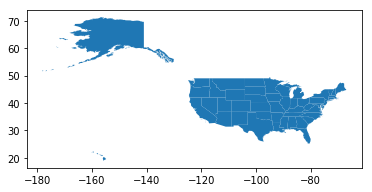

In [90]:
usa.plot()

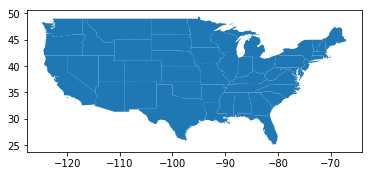

In [91]:
usa[usa['STATE_NAME']!='Alaska'][1:].plot()

In [92]:
usa = usa.set_index('STATE_NAME')

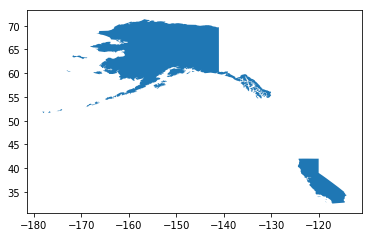

In [93]:
usa.loc[['Alaska','California']].plot()

In [94]:
usa.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
STATE_NAME,,,,,
Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


Below I created a two heat maps to demonstrate the correlation, or lack there of, between school funding and SAT scores. I choose to exclude Hawaii and Alaska. 

In [95]:
SAT_change = SAT_change.set_index('State')
funding_change = funding_change.set_index('State')

In [96]:
usa['sat_change'] = SAT_change['Percent_Change']
usa['funding_change'] = funding_change['Percent_Change']

In [97]:
usa_idx = usa.index
sat_idx = SAT_change.index
fun_idx = funding_change.index

In [98]:
map_states = []
for state in usa_idx:
    if state not in ['Hawaii', 'Alaska']:
        map_states.append(state)
        
usa = usa.loc[map_states]
usa = usa.dropna(how='any')

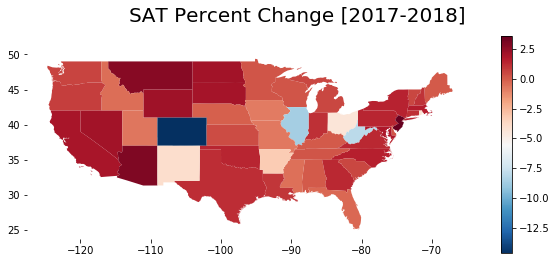

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

usa.plot(column='sat_change', cmap='RdBu_r', legend=True, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.suptitle('SAT Percent Change [2017-2018]', fontsize=20)

plt.savefig('sat')
plt.show()

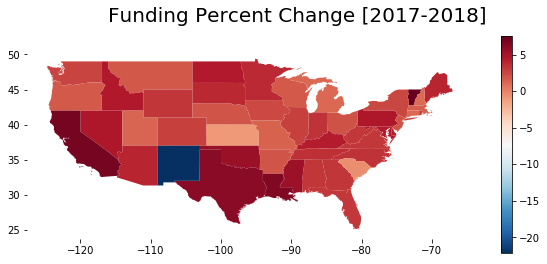

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))

usa.plot(column='funding_change', cmap='RdBu_r', legend=True, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.suptitle('Funding Percent Change [2017-2018]', fontsize=20)

plt.savefig('funding')
plt.show()

The heat maps indicate that there is not a correlation between education funding and SAT scores on the state level. To confirm this I created a scatter plot. 

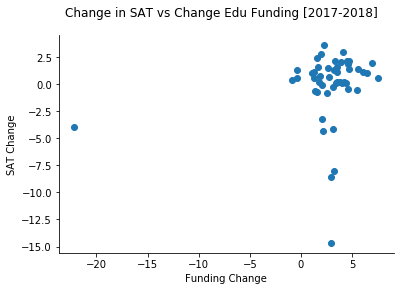

In [101]:
fig,ax = plt.subplots()

ax.scatter(funding_change, SAT_change)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
plt.xlabel('Funding Change')
plt.ylabel('SAT Change')
fig.suptitle('Change in SAT vs Change Edu Funding [2017-2018]', fontsize=12)

plt.savefig('SAT vs funding')
plt.show()

Below I took a more general look at the data by creating bar graphs for funding per school by region in 2017 and 2018, separately, and bar graphs for SAT scores by region in 2017 and 2018, separately (so percent change was not taken into account in the following graphs). 

In [102]:
usa['SAT_2017'] = SAT_2017.set_index('State')['Avg. Cumulative SAT Score']
usa['SAT_2018'] = SAT_2018.set_index('State')['Avg. Cumulative SAT Score']
usa['Funding_2017'] = funding_2017.set_index('State')['Funding per School']
usa['Funding_2018'] = funding_2018.set_index('State')['Funding per School']

In [77]:
usa.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,sat_change,funding_change,SAT_2017,SAT_2018,Funding_2017,Funding_2018
STATE_NAME,,,,,,,,,,,
Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...,1.290323,-0.430544,1085.0,1099.0,585878.555932,583356.088136
Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...,0.651163,2.741402,1075.0,1082.0,280288.680169,287972.518987
Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...,2.759197,1.956477,1196.0,1229.0,228552.730583,233024.311893
Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...,0.098814,4.021876,1012.0,1013.0,227962.077863,237130.429008
North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...,2.149682,4.459710,1256.0,1283.0,248924.264990,260025.564797


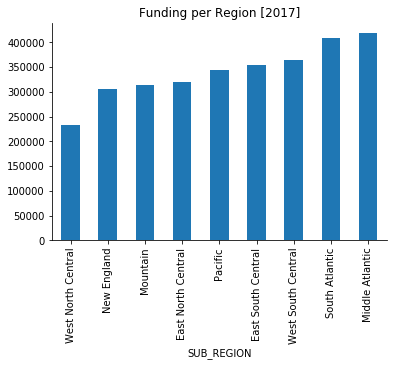

In [148]:
fig, ax = plt.subplots()

usa.groupby('SUB_REGION').mean()['Funding_2017'].sort_values().plot.bar(title = 'Funding per Region [2017]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('regional_funding_2017')
plt.show()

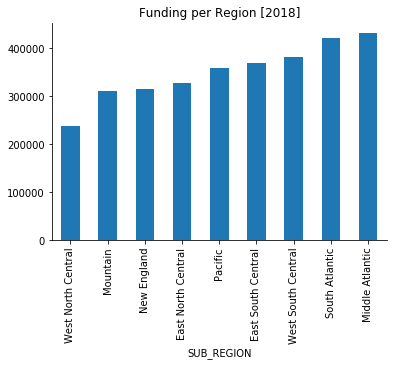

In [149]:
fig, ax = plt.subplots()

usa.groupby('SUB_REGION').mean()['Funding_2018'].sort_values().plot.bar(title = 'Funding per Region [2018]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('regional_funding_2018')
plt.show()

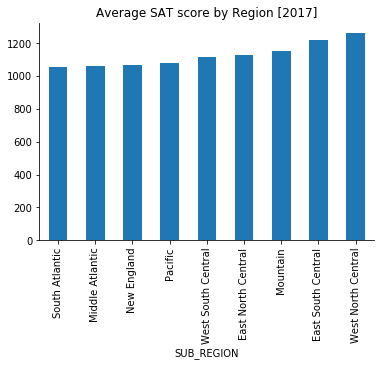

In [150]:
fig, ax = plt.subplots()

usa.groupby('SUB_REGION').mean()['SAT_2017'].sort_values().plot.bar(title = 'Average SAT score by Region [2017]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('avg_regional_SAT_2017')
plt.show()

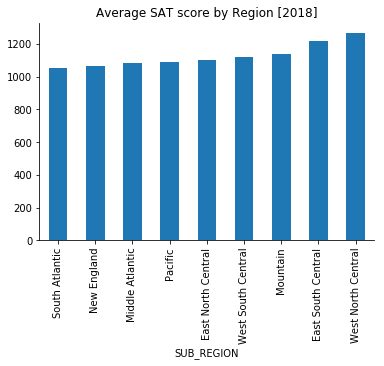

In [115]:
fig, ax = plt.subplots()

usa.groupby('SUB_REGION').mean()['SAT_2018'].sort_values().plot.bar(title = 'Average SAT score by Region [2018]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('avg_regional_SAT_2018')
plt.show()

From these bar graphs it may be noted that the "Middle Alantic" region consistently received the most funding, however remained in the bottow three performance wise. This again suggest that more funding does not necessarily equate to higher test scores.    